# Unevenly Spaced Data

In [6]:
using Multitaper, Plots, FINUFFT

The generalized prolate spheroidal sequences (Bronez, 1988) solve the generalized eigenvalue equation when the observing times are unevenly spaced. We follow the example in (Chave, 2019).

In [16]:
N = 1000
t = (0.0:(N-1)).^(1.05)

W = 0.008
K = 5
f0 = 0.0

lam, u, R = gpss(W, K, t, f0);
lam, u = Multitaper.gpss_orth(W, K, t, f0);

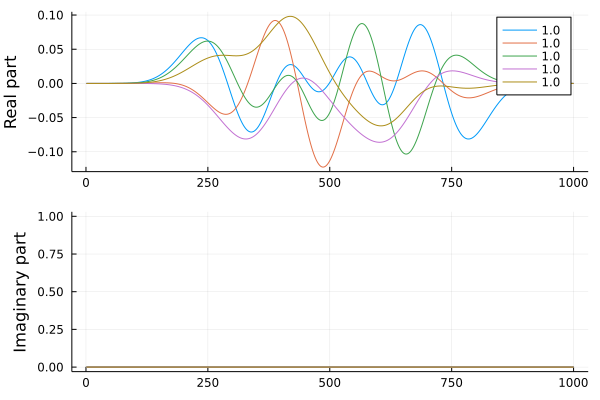

In [3]:
p1 = plot(real.(u), ylabel="Real part", label = round.(lam, digits= 7)') 
p2 = plot(imag.(u), ylabel="Imaginary part", legend = false) 

plot(p1, p2, layout = (2,1))

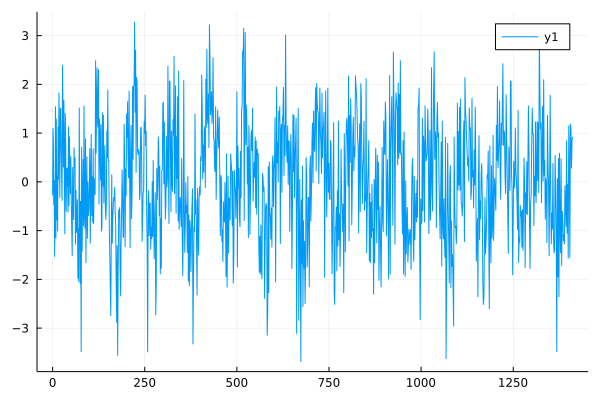

In [4]:
x = sin.(2*pi*0.01*t) + randn(N)
plot(t,x)

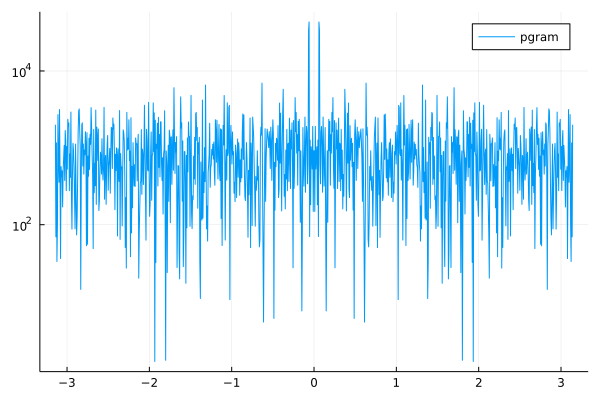

In [9]:
freq = collect(LinRange(-pi, pi, length(t)))
Pxx = abs2.(nufft1d3(t,ComplexF64.(x),-1,1e-15,freq))

plot(freq, Pxx, yscale = :log10, label = "pgram")

In [10]:
Sb = bspec(t, x, W, K, 0.5, 0.0, false)

MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.02199114857512855, 0.025132741228718346, 0.028274333882308135  …  1.5393804002589986, 1.5425219929125884, 1.5456635855661782, 1.548805178219768, 1.5519467708733579, 1.5550883635269477, 1.5582299561805373, 1.561371548834127, 1.564513141487717, 1.5676547341413067], [0.30190136639010834, 0.31525860377309994, 0.22656875399815163, 0.31556269267542464, 0.3130551133263776, 0.2612539222287879, 0.3085321384968086, 0.21831783571799326, 0.6460322794318184, 2.1371471695365063  …  1.363984978483257, 0.5649633911816647, 0.34653018643366074, 0.3372730851952027, 0.368444850831933, 0.391138696932347, 0.38732676897395396, 0.3560846103060088, 0.3101886545767165, 0.2801777422796464], nothing, MTParameters(8.0, 5, 1000, 1.0, 1000, 1, nothing), EigenCoefficient(Complex{Float64}[-0.4674106489515282 + 0.7663748189600414

In [14]:
plot(Sb.S)

In [43]:
nz= 0.0; beta= 0.5
using FFTW
    N, M, M2 = Multitaper._pregap(t, x, nz)
    freq = pi*collect(range(-1.0, 1.0, length = M + 1)[1:M] * beta)
    params = MTParameters(N * W, K, N, 1.0, M, 1, nothing)
    eigenc(j, fr, x) = mapslices(slep -> nufft1d3(t, ComplexF64.(slep .* x), -1, 
                              1e-15, freq)[j + Int(M / 2)]/2, Multitaper.gpss_orth(W, K, t, fr, beta = beta)[2], 
                              dims = 1)
    eco = EigenCoefficient(mapreduce(j -> eigenc(j, freq[j + Int(M / 2)], x), vcat, 
                                                 1:5), nothing) 
size(eco.coef)

(5, 5)

In [32]:
slep = Multitaper.gpss_orth(W, K, t, 0.0, beta = beta)[2][:,1]

1000-element Array{Complex{Float64},1}:
   3.176585856161185e-9 + 0.0im
   5.073356195031209e-9 + 0.0im
   7.589053171096574e-9 + 0.0im
  1.0774158153680978e-8 + 0.0im
  1.4893533052305061e-8 + 0.0im
  2.0028160955945827e-8 + 0.0im
  2.6441152562031163e-8 + 0.0im
  3.4324837102828346e-8 + 0.0im
    4.39171052526428e-8 + 0.0im
  5.5556792529207404e-8 + 0.0im
    6.95176450706556e-8 + 0.0im
   8.625055553337798e-8 + 0.0im
  1.0612571541916053e-7 + 0.0im
                        ⋮
 -1.1865377108421605e-7 + 0.0im
  -9.310330997888106e-8 + 0.0im
  -7.215582898603112e-8 + 0.0im
  -5.517897218893699e-8 + 0.0im
  -4.162738728881644e-8 + 0.0im
  -3.085327864310878e-8 + 0.0im
   -2.22899685292205e-8 + 0.0im
 -1.5649575065499163e-8 + 0.0im
  -1.070554023718603e-8 + 0.0im
  -7.022570257022367e-9 + 0.0im
  -4.147727737414821e-9 + 0.0im
  -1.961300625760022e-9 + 0.0im

In [39]:
fftshift(nufft1d3(t, ComplexF64.(slep .* x), -1, 
                              1e-15, freq))/2

1000-element Array{Complex{Float64},1}:
 -0.2334467469381466 - 2.239812778439525e-16im
 -0.4674106489515282 + 0.7663748189600414im
  0.9246504407286327 - 0.0527030039065558im
  0.1292881291418378 - 0.24959210532960616im
 -0.4362006275438328 - 0.837852447840397im
  -0.502412370566789 + 0.7517855293504735im
 0.04446818211647785 + 0.21087716961155975im
   0.579119001539277 + 0.29491657281984945im
 0.18650501023131658 - 0.19320554772793208im
   0.411523603943245 - 1.1097432797091067im
  -2.294902953552355 + 0.4271008373075461im
  1.8455724583081432 + 1.7877647174625264im
 0.13099206139987024 - 1.1801605644656417im
                     ⋮
 0.13099206139987016 + 1.1801605644656417im
  1.8455724583080821 - 1.7877647174624776im
 -2.2949029535523553 - 0.4271008373075463im
 0.41152360394324483 + 1.1097432797091067im
  0.1865050102313794 + 0.1932055477277821im
  0.5791190015392768 - 0.2949165728198494im
 0.04446818211647782 - 0.21087716961155978im
  -0.502412370566789 - 0.7517855293504735im
 -0.43